# Regressão Linear
***

## Índice

1. [Importando bibliotecas](#importando-bibliotecas)
2. [Análise do dataset](#análise-do-dataset)
3. [Treinamento do modelo](#treinamento-do-modelo)

## Importanto Bibliotecas

In [1]:
# Bibliotecas de manipualção e visualização de dados
import pandas as pd
import matplotlib.pyplot as plt

# Classes dos modelo
from sklearn.linear_model import LinearRegression

#Funções de avaliação dos modelos
from sklearn.metrics import  mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

## Análise do dataset

**House**: A tarefa é prever o preço médio da casa na região com base na composição demográfica e no estado do mercado imobiliário na região. Descrição [link](https://sci2s.ugr.es/keel/dataset.php?cod=95#sub1).

In [2]:
dataset = pd.read_csv("https://raw.githubusercontent.com/Francimaria/especializacao_DNN/main/datasets/house.csv")

In [3]:
dataset.columns

Index(['Price', 'P1', ' P5p1', ' P6p2', ' P11p4', ' P14p9', ' P15p1', ' P15p3',
       ' P16p2', ' P18p2', ' P27p4', ' H2p2', ' H8p2', ' H10p1', ' H13p1',
       ' H18pA', ' H40p4'],
      dtype='object')

In [4]:
# vamos olhar para uma pequena parte do dataset
dataset.head()

,Price,P1,P5p1,P6p2,P11p4,P14p9,P15p1,P15p3,P16p2,P18p2,P27p4,H2p2,H8p2,H10p1,H13p1,H18pA,H40p4
0,14999,219,0.506849,0.031963,0.146119,0.101852,0.876712,0.000000,0.746988,0.012048,0.060241,0.231482,0.024096,0.987952,0.351852,0.000000,0.800000
1,106200,2273,0.495381,0.018918,0.067312,0.045336,0.794545,0.016718,0.641053,0.002105,0.076842,0.064961,0.017895,0.997895,0.170276,0.054217,0.258064
2,14999,564,0.457447,0.058511,0.299645,0.238562,0.764184,0.010638,0.567273,0.003636,0.014545,0.140625,0.054545,0.996364,0.381250,0.056180,1.000000
3,29900,620,0.495161,0.003226,0.104839,0.086262,0.909677,0.000000,0.792793,0.009009,0.027027,0.051282,0.004504,0.995495,0.183761,0.162791,0.000000
4,85900,3809,0.491730,0.205303,0.107115,0.085744,0.899449,0.000000,0.766566,0.008283,0.039910,0.017024,0.200301,0.985693,0.198372,0.106557,0.666667


### Separando o conjunto de dados

In [5]:
X = dataset.drop(["Price"], axis = 1)
y = dataset["Price"]

X_train, X_test, y_train, y_test = train_test_split(X,y)

## Treinamento do modelo

A regressão linear é um modelo de regressão. Lembrando da fómula da equação linear: $y = a \times x  + b$


In [6]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

y_pred = regression_model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2_score:", r2_score(y_test, y_pred))

MSE: 2085218848.787669
R2_score: 0.24140704501690358


MSE = $\frac{1}{n} \sum\limits_{i = 1}^{n}(y_i-\hat{y_i})^2$

$R^2$ - coeficiente de determinação [link](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)

Text(0.5, 1.0, 'True x Predicted')

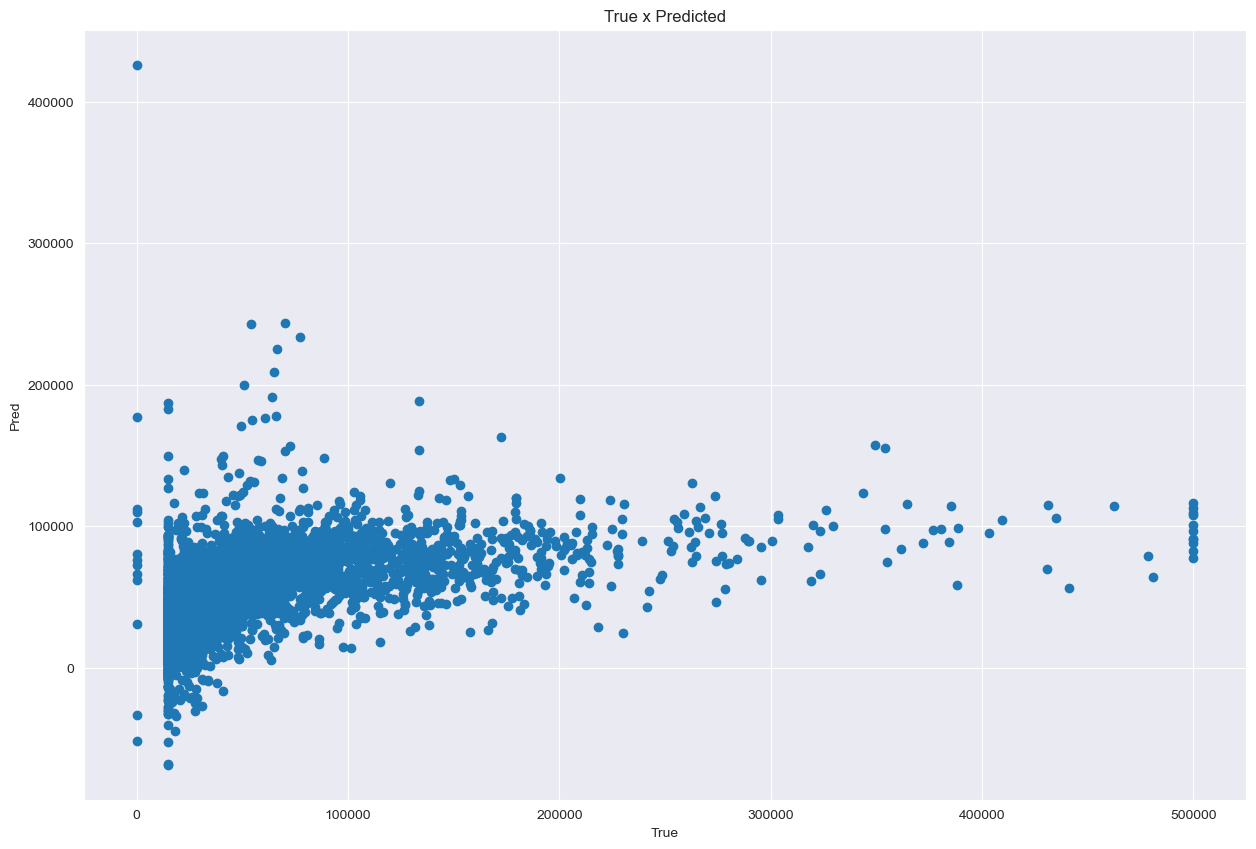

In [7]:
plt.figure(figsize=(15,10))
plt.scatter(y_test, y_pred)
plt.xlabel("True")
plt.ylabel("Pred")
plt.title("True x Predicted")

In [8]:
pred_y_df = pd.DataFrame({"True Value": y_test, "Predicted value": y_pred, "Difference": y_test-y_pred}).round(2)
pred_y_df

,True Value,Predicted value,Difference
3388,62300,76461.78,-14161.78
8197,14999,15290.31,-291.31
13279,92000,45259.31,46740.69
5424,14999,24846.77,-9847.77
15936,23800,27787.84,-3987.84
...,...,...,...
18932,14999,34322.39,-19323.39
14015,123200,73687.64,49512.36
8267,133100,121973.43,11126.57
3239,110500,95810.13,14689.87
